# Restaurant

In [ ]:
options("scipen"=100, "digits"=4)

if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if (!require("Metrics")) install.packages("Metrics")

library("rpart")
library("rpart.plot")
library("Metrics")

## Load the Training Data

Here is some data that involves trying to predict when someone will be
willing to wait for a table in a restaurant vs when they will leave. The
restaurant would like to understand both when this will happen and also
under what conditions. Here is the data that we hae so far:

| Alternate | Bar | Fri/Sat | Hungry | Patrons | Price     | Raining | Reservation | Type    | WaitEstimate | WillWait |
|--------|----|-------|------|-------|--------|-------|---------|-------|---------|-------|
| Yes       | No  | No      | Yes    | Some    | Expensive | No      | Yes         | French  | 0-10         | Yes      |
| Yes       | No  | No      | Yes    | Full    | Cheap     | No      | No          | Thai    | 30-60        | No       |
| No        | Yes | No      | No     | Some    | Cheap     | No      | No          | Burger  | 0-10         | Yes      |
| Yes       | No  | Yes     | Yes    | Full    | Cheap     | No      | No          | Thai    | 10-30        | Yes      |
| Yes       | No  | Yes     | No     | Full    | Expensive | No      | Yes         | French  | \>60         | No       |
| No        | Yes | No      | Yes    | Some    | Moderate  | Yes     | Yes         | Italian | 0-10         | Yes      |
| No        | Yes | No      | No     | None    | Cheap     | Yes     | No          | Burger  | 0-10         | No       |
| No        | No  | No      | Yes    | Some    | Moderate  | Yes     | Yes         | Thai    | 0-10         | Yes      |
| No        | Yes | Yes     | No     | Full    | Cheap     | Yes     | No          | Burger  | \>60         | No       |
| Yes       | Yes | Yes     | Yes    | Full    | Expensive | No      | Yes         | Italian | 10-30        | No       |
| No        | No  | No      | No     | None    | Cheap     | No      | No          | Thai    | 0-10         | No       |
| Yes       | Yes | Yes     | Yes    | Full    | Cheap     | No      | No          | Burger  | 30-60        | Yes      |

Note we are trying to predict `WillWait` from the rest of the
predictors. There are 10 predictors in this case.

In [ ]:
url<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vQvQ1hQJoj_3BmOV3uLWcDzwIw3GFhkS84NePBS57lnCmXSN86KU8kn4aQUE9rGsxJPMi32S55JBl9w/pub?gid=0&single=true&output=csv"
train<-read.csv(url, stringsAsFactor=F)

Now let’s print out the training set to make sure we read it correctly:

In [ ]:
print(train)

   Alternate Bar Fri.Sat Hungry Patrons     Price Raining Reservation    Type
1        Yes  No      No    Yes    Some Expensive      No         Yes  French
2        Yes  No      No    Yes    Full     Cheap      No          No    Thai
3         No Yes      No     No    Some     Cheap      No          No  Burger
4        Yes  No     Yes    Yes    Full     Cheap      No          No    Thai
5        Yes  No     Yes     No    Full Expensive      No         Yes  French
6         No Yes      No    Yes    Some  Moderate     Yes         Yes Italian
7         No Yes      No     No    None     Cheap     Yes          No  Burger
8         No  No      No    Yes    Some  Moderate     Yes         Yes    Thai
9         No Yes     Yes     No    Full     Cheap     Yes          No  Burger
10       Yes Yes     Yes    Yes    Full Expensive      No         Yes Italian
11        No  No      No     No    None     Cheap      No          No    Thai
12       Yes Yes     Yes    Yes    Full     Cheap      No       

## Load the Testing Data

Lets read in the testing data set:

In [ ]:
testurl<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vQvQ1hQJoj_3BmOV3uLWcDzwIw3GFhkS84NePBS57lnCmXSN86KU8kn4aQUE9rGsxJPMi32S55JBl9w/pub?gid=289547774&single=true&output=csv"
test<-read.csv(testurl, stringsAsFactors=F)
str(test)

'data.frame':   7 obs. of  11 variables:
 $ Alternate   : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Bar         : chr  "Yes" "No" "Yes" "No" ...
 $ Fri.Sat     : chr  "No" "No" "Yes" "Yes" ...
 $ Hungry      : chr  "Yes" "No" "No" "Yes" ...
 $ Patrons     : chr  "Full" "Full" "Some" "None" ...
 $ Price       : chr  "Expensive" "Moderate" "Expensive" "Cheap" ...
 $ Raining     : chr  "Yes" "Yes" "No" "No" ...
 $ Reservation : chr  "Yes" "No" "No" "No" ...
 $ Type        : chr  "Thai" "Italian" "French" "Burger" ...
 $ WaitEstimate: chr  "0-10" "0-10" "30-60" "0-10" ...
 $ WillWait    : chr  "No" "No" "Yes" "No" ...

Now let’s print out the testing set to make sure we read it correctly:

In [ ]:
print(test)

  Alternate Bar Fri.Sat Hungry Patrons     Price Raining Reservation    Type
1       Yes Yes      No    Yes    Full Expensive     Yes         Yes    Thai
2       Yes  No      No     No    Full  Moderate     Yes          No Italian
3       Yes Yes     Yes     No    Some Expensive      No          No  French
4       Yes  No     Yes    Yes    None     Cheap      No          No  Burger
5       Yes Yes      No     No    Some     Cheap      No         Yes    Thai
6        No  No     Yes    Yes    Full Expensive      No         Yes Italian
7       Yes  No      No     No    Full     Cheap     Yes          No  Burger
  WaitEstimate WillWait
1         0-10       No
2         0-10       No
3        30-60      Yes
4         0-10       No
5        10-30      Yes
6          >60       No
7         0-10       No

### Model 1 - predict `WillWait` from `Price`

#### Train with Training Data

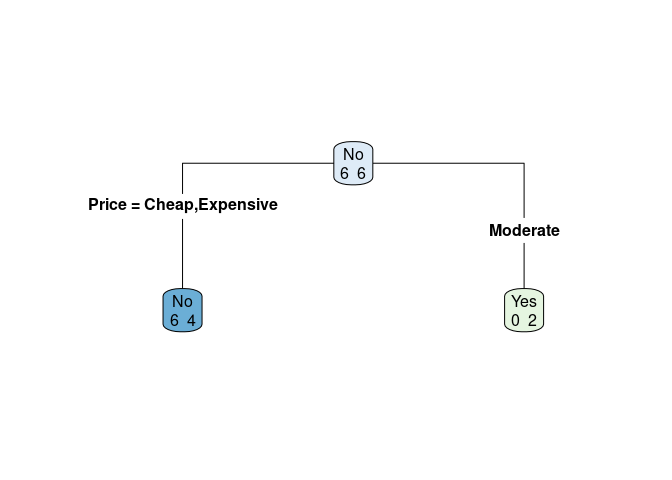

In [ ]:
control = rpart.control(minsplit=1, maxdepth=1)
model <- rpart(WillWait~Price, 
               data=train, 
               method="class", 
               control = control)
rpart.plot(model, type=4, extra = 1, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test$WillWait, predictions=pred)
print(compare)

  actual predictions
1     No          No
2     No         Yes
3    Yes          No
4     No          No
5    Yes          No
6     No          No
7     No          No

Here is the confusion matrix:

In [ ]:
table(test$WillWait, pred)

     pred
      No Yes
  No   4   1
  Yes  2   0

Here is the accuracy:

In [ ]:
accuracy(test$WillWait, pred)

[1] 0.5714

### Model 2 - predict `WillWait` from `Patrons`

#### Train with Training Data

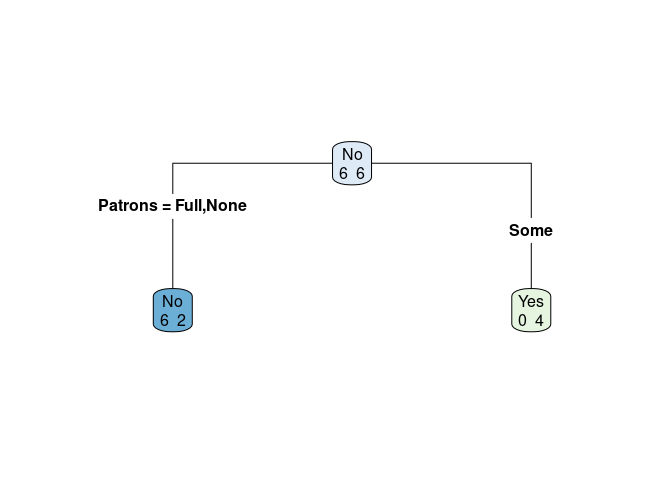

In [ ]:
control = rpart.control(minsplit=1, maxdepth=1)
model <- rpart(WillWait~Patrons, 
               data=train, 
               method="class", 
               control = control)
rpart.plot(model, type=4, extra = 1, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test$WillWait, predictions=pred)
print(compare)

  actual predictions
1     No          No
2     No          No
3    Yes         Yes
4     No          No
5    Yes         Yes
6     No          No
7     No          No

Here is the confusion matrix:

In [ ]:
table(test$WillWait, pred)

     pred
      No Yes
  No   5   0
  Yes  0   2

Here is the accuracy:

In [ ]:
accuracy(test$WillWait, pred)

[1] 1

### Model 3 - all predictors

#### Train with Training Data

Finally here is a model using all the variables

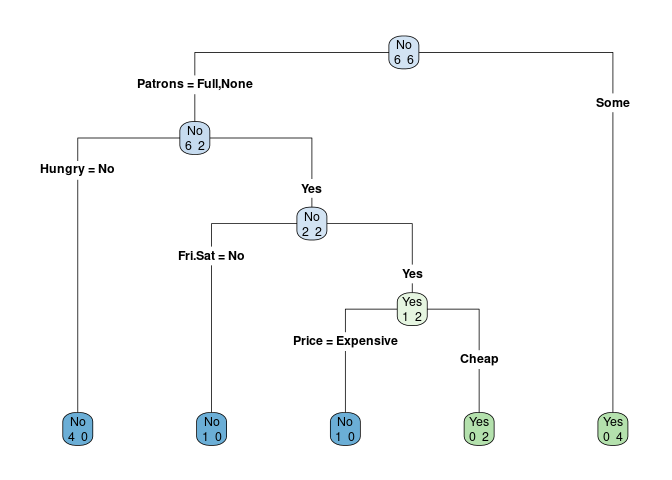

In [ ]:
control = rpart.control(minsplit=1)
model <- rpart(WillWait~., data=train, method="class", control = control)
rpart.plot(model, type=4, extra = 1, digits=-2)

Note that not all predictors get used in this example. The model figures
out which ones are relevant on its own here.

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test$WillWait, predictions=pred)
print(compare)

  actual predictions
1     No          No
2     No          No
3    Yes         Yes
4     No         Yes
5    Yes         Yes
6     No          No
7     No          No

Here is the confusion matrix:

In [ ]:
table(test$WillWait, pred)

     pred
      No Yes
  No   4   1
  Yes  0   2

Here is the accuracy:

In [ ]:
accuracy(test$WillWait, pred)

[1] 0.8571